In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor
import lightgbm
from lightgbm import early_stopping, log_evaluation
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

import time
import warnings
warnings.filterwarnings('ignore')

In [21]:
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
# 데이터 로드
train = pd.read_csv('train_for_model_2015_add_fe.csv', encoding='utf-8')
test = pd.read_csv('test_for_model_2015_add_fe.csv', encoding='utf-8')

In [5]:
train.head()

,전용면적(㎡),계약년월,층,건축년도,구,회사채금리,매매가격지수,건설공사비지수,거래량,버스정류장수,...,delta6,delta12,MA3,MA6,전용면적(log),전용면적구간,평수,대장아파트거리(log),대장아파트거리접근성,target
0,79.97,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,0.441,0.487,2.644000,2.477167,4.394079,60㎡이상84㎡미만,24.233333,2.030149,E매우멀음,124000
1,79.97,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,0.441,0.487,2.644000,2.477167,4.394079,60㎡이상84㎡미만,24.233333,2.030149,E매우멀음,123500
2,54.98,201712,저층,1987,강남구,2.649,85.9,92.15,8547,86.0,...,0.441,0.487,2.644000,2.477167,4.024994,59㎡미만,16.660606,2.030149,E매우멀음,91500
3,79.97,201801,저층,1987,강남구,2.722,87.0,93.52,12566,86.0,...,0.444,0.618,2.693333,2.551167,4.394079,60㎡이상84㎡미만,24.233333,2.030149,E매우멀음,130000
4,79.97,201801,저층,1987,강남구,2.722,87.0,93.52,12566,86.0,...,0.444,0.618,2.693333,2.551167,4.394079,60㎡이상84㎡미만,24.233333,2.030149,E매우멀음,117000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635467 entries, 0 to 635466
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   전용면적(㎡)       635467 non-null  float64
 1   계약년월          635467 non-null  int64  
 2   층             635467 non-null  object 
 3   건축년도          635467 non-null  int64  
 4   구             635467 non-null  object 
 5   회사채금리         635467 non-null  float64
 6   매매가격지수        635467 non-null  float64
 7   건설공사비지수       635467 non-null  float64
 8   거래량           635467 non-null  int64  
 9   버스정류장수        635467 non-null  float64
 10  지하철수          635467 non-null  float64
 11  연식            635467 non-null  int64  
 12  강남권여부         635467 non-null  int64  
 13  아파트명          635467 non-null  object 
 14  x좌표           635467 non-null  float64
 15  y좌표           635467 non-null  float64
 16  대장아파트거리       635467 non-null  float64
 17  버스거리          635467 non-null  float64
 18  지하철거

In [7]:
test.head()

,전용면적(㎡),계약년월,층,건축년도,구,회사채금리,매매가격지수,건설공사비지수,거래량,버스정류장수,...,delta3,delta6,delta12,MA3,MA6,전용면적(log),전용면적구간,평수,대장아파트거리(log),대장아파트거리접근성
0,79.9700,202307,저층,1987,강남구,4.437,93.0,127.33,3593,86.0,...,0.365,-0.267,0.311,4.310667,4.243667,4.394079,60㎡이상84㎡미만,24.233333,2.030149,E매우멀음
1,108.2017,202308,중층,2021,강남구,4.500,93.4,127.39,3868,86.0,...,0.361,0.226,0.273,4.431000,4.281333,4.693197,85㎡이상,32.788394,1.913453,E매우멀음
2,161.0000,202307,중층,1984,강남구,4.437,93.0,127.33,3593,86.0,...,0.365,-0.267,0.311,4.310667,4.243667,5.087596,85㎡이상,48.787879,1.918413,E매우멀음
3,133.4600,202308,중층,1984,강남구,4.500,93.4,127.39,3868,86.0,...,0.361,0.226,0.273,4.431000,4.281333,4.901267,85㎡이상,40.442424,1.918413,E매우멀음
4,104.4300,202308,중층,1984,강남구,4.500,93.4,127.39,3868,86.0,...,0.361,0.226,0.273,4.431000,4.281333,4.658047,85㎡이상,31.645455,1.918413,E매우멀음


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   전용면적(㎡)       9272 non-null   float64
 1   계약년월          9272 non-null   int64  
 2   층             9272 non-null   object 
 3   건축년도          9272 non-null   int64  
 4   구             9272 non-null   object 
 5   회사채금리         9272 non-null   float64
 6   매매가격지수        9272 non-null   float64
 7   건설공사비지수       9272 non-null   float64
 8   거래량           9272 non-null   int64  
 9   버스정류장수        9272 non-null   float64
 10  지하철수          9272 non-null   float64
 11  연식            9272 non-null   int64  
 12  강남권여부         9272 non-null   int64  
 13  아파트명          9272 non-null   object 
 14  x좌표           9272 non-null   float64
 15  y좌표           9272 non-null   float64
 16  대장아파트거리       9272 non-null   float64
 17  버스거리          9272 non-null   float64
 18  지하철거리         9272 non-null 

In [9]:
# 기존 데이터 copy
train_origin = train.copy()
test_origin = test.copy()

In [10]:
# 범주형 변수 인코딩
# 1. 범주형 컬럼 선택
cat_cols = train.select_dtypes(include=['object', 'category']).columns

# 2. LabelEncoder 학습 (train 기준)
le_dict = {}  # 컬럼별 encoder 저장
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    le_dict[col] = le  # 나중에 test 변환용으로 저장

# 3. test 데이터 변환 (train에서 학습한 encoder 사용)
for col in cat_cols:
    le = le_dict[col]
    # test에 train에 없는 새로운 값이 있으면 에러가 날 수 있으므로 주의
    test[col] = le.transform(test[col].astype(str))

In [40]:
# train target 분류
train_x = train[train.columns[train.columns != 'target']]
train_y = train['target']

X_test = test.copy()

# target 로그 변환
train_y = np.log1p(train_y)

In [41]:
# train만 준비(제출시)
# X_train = train_x.copy()
# y_train = train_y.copy()
# print("Train shape:", X_train.shape, y_train.shape)
# print("test shape:", X_test.shape)

Train shape: (635467, 37) (635467,)
test shape: (9272, 37)


In [42]:
# train/validation 분할(RMSE 성능 보기 및 앙상블)
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=42, shuffle=True)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("test shape:", X_test.shape)

# validation y 로그 변환
y_val = np.expm1(y_val)
y_val.head()

In [59]:
# 칼럼명 정의
# 다양한 조합으로 칼럼을 넣고 모델링을 해봅시다.(rf에 유용)
# lgbm, xgboost는 모두 넣고 진행해도 괜찮은 듯합니다.

use_cols=['전용면적(㎡)', '계약년월', '층', '건축년도', '구', '회사채금리', '매매가격지수', '건설공사비지수',
          '거래량', '버스정류장수', '지하철수', '연식', '강남권여부', '아파트명', 'x좌표', 'y좌표', '대장아파트거리',
          '버스거리', '지하철거리', '지하철접근성', '초등학교거리', '초등학교거리구분', '1km이내학교수', '고등학교진학률',
          '회사채금리t3', '회사채금리t6', '회사채금리t12', 'delta3', 'delta6', 'delta12', 'MA3',
          'MA6', '전용면적(log)', '전용면적구간', '평수', '대장아파트거리(log)', '대장아파트거리접근성']

In [50]:
# 랜덤포레스트 학습
rf = RandomForestRegressor(
    n_estimators=200,      # 트리 개수
    max_depth=None,        # 트리 깊이
    random_state=42,
    n_jobs=-1              # 병렬 처리
)

# 학습 시작 시간 기록
start_time = time.time()

# 모델 학습
rf.fit(X_train[use_cols], y_train) # cols

# 학습 종료 시간 기록
end_time = time.time()
training_time = end_time - start_time
print(f"Random Forest 학습 시간: {training_time:.2f} 초")

# Validation RMSE(RMSE 성능보기)
# y_val_pred_log = rf.predict(X_val[use_cols])
# y_val_pred = np.expm1(y_val_pred_log)

# val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
# print(f"Validation RMSE: {val_rmse}") #:.4f

# # Test 예측(제출시)
y_test_pred_log = rf.predict(X_test[use_cols]) # cols

Random Forest 학습 시간: 95.96 초


In [51]:
# max_depth=None(트리개수 제한 없음)일때 트리 깊이 확인해보기
depths = [estimator.tree_.max_depth for estimator in rf.estimators_]

print("트리 깊이 요약")
print("최소 깊이:", min(depths))
print("평균 깊이:", sum(depths) / len(depths))
print("최대 깊이:", max(depths))

트리 깊이 요약
최소 깊이: 41
평균 깊이: 44.11
최대 깊이: 50


In [53]:
# RF feature importance
rf_importance = pd.DataFrame({
    'feature': X_train[use_cols].columns, # cols
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

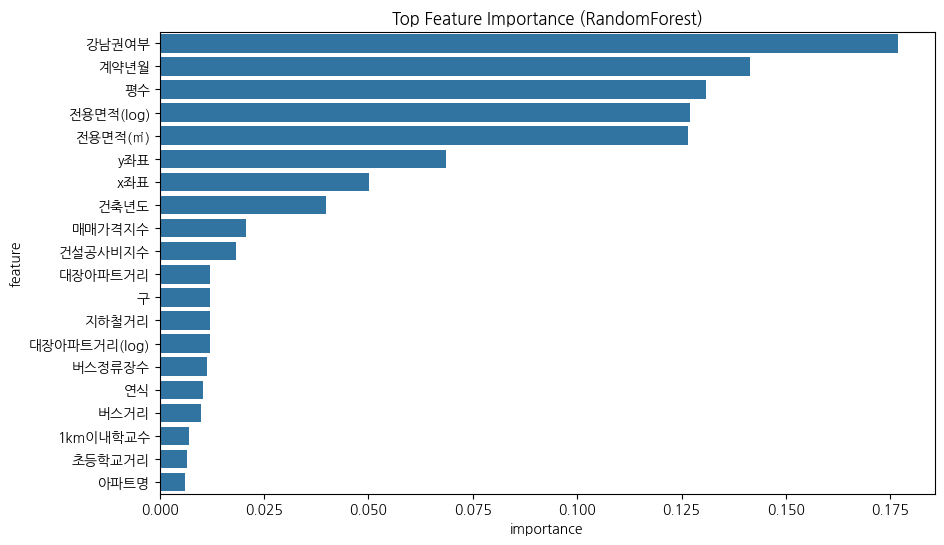

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=rf_importance.head(40))
plt.title("Top Feature Importance (RandomForest)")
plt.show()

In [24]:
# LGBM 모델 정의
# lgbm = LGBMRegressor(
#     n_estimators=1000,          # 충분히 크게 두고 early stopping으로 조기 중단
#     learning_rate=0.05,        # 너무 크지 않게
#     max_depth=10,              # 트리 깊이 제한
#     num_leaves=31,             # 기본값보다 크게 잡으면 과적합 ↑ → 적당히 제한
#     min_child_samples=50,      # 리프에 최소 샘플 수 → 크게 잡으면 과적합 ↓
#     feature_fraction=0.8,      # 피처 중 일부만 사용 → 랜덤성 ↑
#     bagging_fraction=0.8,      # 데이터 샘플링 → 랜덤성 ↑
#     bagging_freq=5,            # 5회마다 샘플링
#     lambda_l1=1.0,             # L1 정규화
#     lambda_l2=1.0,             # L2 정규화
#     random_state=42,
#     n_jobs=-1
# )

lgbm = LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.05,
    num_leaves=64,
    max_depth=20,
    min_data_in_leaf=100,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=1,
    random_state=42
)

# 학습 시작 시간 기록
start_time = time.time()

lgbm.fit(
    X_train[use_cols], y_train,
    eval_set=[(X_val[use_cols], y_val)],
    # eval_set=[(X_train[use_cols], y_train)],
    eval_metric="rmse",
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=100)]
)

# 학습 종료 시간 기록
end_time = time.time()
training_time = end_time - start_time
print(f"LGBM 학습 시간: {training_time:.2f} 초")

# Validation RMSE(RMSE 성능보기)
y_val_pred_log = lgbm.predict(X_val[use_cols])
y_val_pred = np.expm1(y_val_pred_log)

val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {val_rmse}") #:.4f

# Test 예측(제출시)
# y_test_pred_log = lgbm.predict(X_test[use_cols])

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threadi

In [26]:
# LGBM feature importance
lgbm_importance = pd.DataFrame({
    'feature': X_train[use_cols].columns,
    'importance': lgbm.feature_importances_
}).sort_values(by='importance', ascending=False)

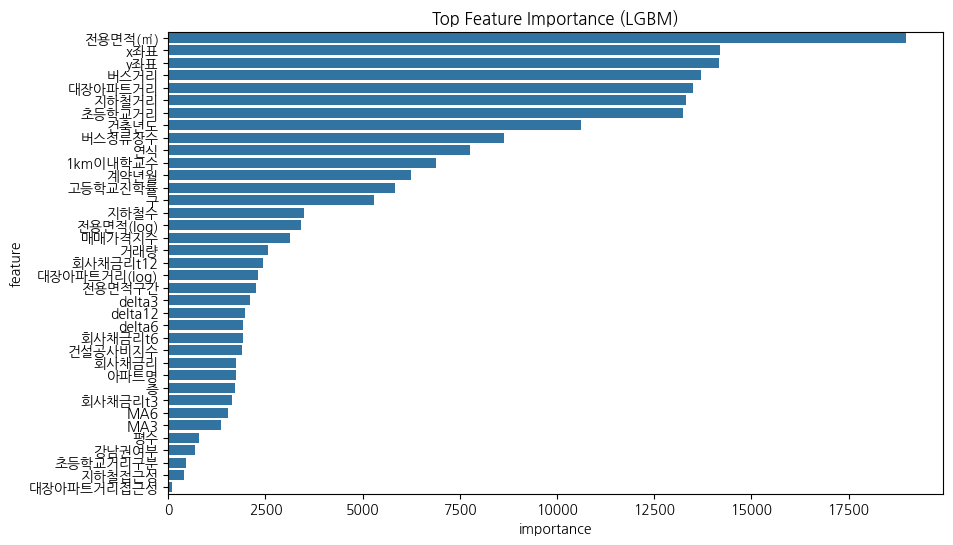

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=lgbm_importance.head(40))
plt.title("Top Feature Importance (LGBM)")
plt.show()

In [29]:
# XGBoost
dtrain = xgb.DMatrix(X_train[use_cols], y_train)
dvalid = xgb.DMatrix(X_val[use_cols], y_val)
dtest = xgb.DMatrix(X_test[use_cols])

# 모델 파라미터
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.05,
    "max_depth": 8,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1.0,   # L2
    "alpha": 0.0,    # L1
    "seed": 42
}

# 학습
evals = [(dtrain, "train"), (dvalid, "valid")]

num_round = 10000
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=num_round,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100
)

# Validation RMSE(RMSE 성능보기)
y_val_pred_log = bst.predict(dvalid)
y_val_pred = np.expm1(y_val_pred_log)  # 로그 역변환

rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Validation RMSE:", rmse)

# test 예측(제출시)
# y_test_pred_log = bst.predict(dtest)

[0]	train-rmse:0.60252	valid-rmse:86724.03527
[100]	train-rmse:0.13048	valid-rmse:86723.73542
[200]	train-rmse:0.10902	valid-rmse:86723.72445
[300]	train-rmse:0.09569	valid-rmse:86723.72125
[400]	train-rmse:0.08755	valid-rmse:86723.71959
[500]	train-rmse:0.08206	valid-rmse:86723.71863
[600]	train-rmse:0.07744	valid-rmse:86723.71782
[700]	train-rmse:0.07374	valid-rmse:86723.71734
[800]	train-rmse:0.07074	valid-rmse:86723.71690
[900]	train-rmse:0.06799	valid-rmse:86723.71652
[1000]	train-rmse:0.06581	valid-rmse:86723.71625
[1100]	train-rmse:0.06385	valid-rmse:86723.71604
[1200]	train-rmse:0.06220	valid-rmse:86723.71579
[1300]	train-rmse:0.06068	valid-rmse:86723.71564
[1400]	train-rmse:0.05928	valid-rmse:86723.71548
[1500]	train-rmse:0.05806	valid-rmse:86723.71533
[1600]	train-rmse:0.05693	valid-rmse:86723.71519
[1700]	train-rmse:0.05591	valid-rmse:86723.71510
[1800]	train-rmse:0.05500	valid-rmse:86723.71501
[1900]	train-rmse:0.05416	valid-rmse:86723.71494
[2000]	train-rmse:0.05337	valid-

In [33]:
# xgb feature importance
xgb_importance = bst.get_score(importance_type='gain')
xgb_importance = pd.DataFrame(xgb_importance.items(), columns=['feature', 'importance'])
xgb_importance = xgb_importance.sort_values(by='importance', ascending=False)

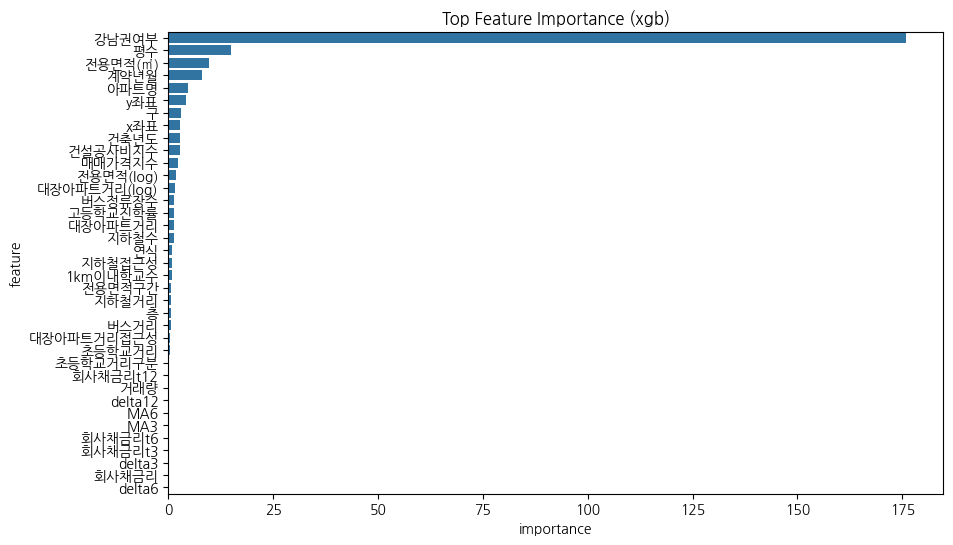

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(xgb_importance, x='importance', y='feature')
plt.title("Top Feature Importance (xgb)")
plt.show()

In [470]:
# 앙상블
# ---------------------------
# 1. 모델 정의
# ---------------------------
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

lgbm = LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.05,
    num_leaves=64,
    max_depth=20,
    min_data_in_leaf=100,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=1,
    random_state=42
)

xgb = XGBRegressor(
    n_estimators=5000,
    learning_rate=0.05,
    max_depth=8,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50,
    eval_metric='rmse'
)

# ---------------------------
# 2. 학습 (train/val 나눠져 있다고 가정)
# ---------------------------
rf.fit(X_train[use_cols], y_train)  # RF는 early stopping 없음

lgbm.fit(
    X_train[use_cols], y_train,
    eval_set=[(X_val[use_cols], y_val)],
    eval_metric="rmse",
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=100)]
)

xgb.fit(
    X_train[use_cols], y_train,
    eval_set=[(X_val[use_cols], y_val)],
    verbose=False
)

# ---------------------------
# 3. validation 예측 및 RMSE
# ---------------------------
rf_val = rf.predict(X_val[use_cols])
lgbm_val = lgbm.predict(X_val[use_cols])
xgb_val = xgb.predict(X_val[use_cols])

rf_val = np.expm1(rf_val)
lgbm_val = np.expm1(lgbm_val)
xgb_val = np.expm1(xgb_val)

rmse_rf = np.sqrt(mean_squared_error(y_val, rf_val))
rmse_lgbm = np.sqrt(mean_squared_error(y_val, lgbm_val))
rmse_xgb = np.sqrt(mean_squared_error(y_val, xgb_val))

print("RF RMSE:", rmse_rf)
print("LGBM RMSE:", rmse_lgbm)
print("XGB RMSE:", rmse_xgb)

# ---------------------------
# 4. 1/RMSE 비례 가중치 계산
# ---------------------------
inv = np.array([1/rmse_rf, 1/rmse_lgbm, 1/rmse_xgb])
weights = inv / inv.sum()
print("가중치:", weights)

# ---------------------------
# 5. validation 앙상블 성능 확인
# ---------------------------
ensemble_val = (
    weights[0]*rf_val +
    weights[1]*lgbm_val +
    weights[2]*xgb_val
)
rmse_ensemble = np.sqrt(mean_squared_error(y_val, ensemble_val))
print("앙상블 RMSE:", rmse_ensemble)

# ---------------------------
# 6. 최종 test 예측
# ---------------------------
rf_test = rf.predict(X_test[use_cols])
lgbm_test = lgbm.predict(X_test[use_cols])
xgb_test = xgb.predict(X_test[use_cols])

rf_test = np.expm1(rf_test)
lgbm_test = np.expm1(lgbm_test)
xgb_test = np.expm1(xgb_test)


y_pred = (
    weights[0]*rf_test +
    weights[1]*lgbm_test +
    weights[2]*xgb_test
)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

### 단일 모델 제출

In [55]:
# 단일 모델 학습 결과
y_test_pred_log

array([12.15023938, 12.5175014 , 12.69384615, ..., 11.19915427,
       11.10194735, 11.1390331 ], shape=(9272,))

In [56]:
# 원래 스케일로 변환
y_test_pred = np.expm1(y_test_pred_log)
y_test_pred

array([189138.36012141, 273073.90248153, 325736.18394174, ...,
        73067.6196105 ,  66299.14414708,  68804.09666751], shape=(9272,))

In [57]:
# submission에 맞춰서 타입 변경
submission = pd.DataFrame(y_test_pred, columns=['target'])
submission['target'] = round(submission['target'])
submission['target'] = submission['target'].astype('int')

In [58]:
# 제출 csv 생성
submission.to_csv('submission_250909.csv', index=False)

### 앙상블 모델 제출

In [471]:
# 앙상블 모델 학습 결과
y_pred

array([185521.55346513, 298567.47418597, 333674.6050642 , ...,
        78473.45917698,  70685.29145572,  69477.43201642], shape=(9272,))

In [472]:
# submission에 맞춰서 타입 변경
submission = pd.DataFrame(y_pred, columns=['target'])
submission['target'] = round(submission['target'])
submission['target'] = submission['target'].astype('int')

In [473]:
# 제출 csv 생성
submission.to_csv('submission_250908.csv', index=False)